In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [3]:
train_images_with_noise = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)

In [4]:
train_images_with_zeros = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

In [5]:
from tensorflow import keras
from tensorflow.keras import models, layers

In [8]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
    )
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

In [9]:
model = get_model()
history_noise = model.fit(train_images_with_noise, train_labels, epochs=10, batch_size=128, validation_split=0.2)

model = get_model()
history_zeros = model.fit(train_images_with_zeros, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6053 - accuracy: 0.8128 - val_loss: 0.3086 - val_accuracy: 0.8964
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2512 - accuracy: 0.9224 - val_loss: 0.1962 - val_accuracy: 0.9423
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1641 - accuracy: 0.9485 - val_loss: 0.1376 - val_accuracy: 0.9602
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1180 - accuracy: 0.9636 - val_loss: 0.1441 - val_accuracy: 0.9561
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.1693 - val_accuracy: 0.9535
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.1413 - val_accuracy: 0.9596
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0480 - accuracy: 0.9841 - val_loss: 0.1296 - val_accuracy: 0.9663
Epoch 

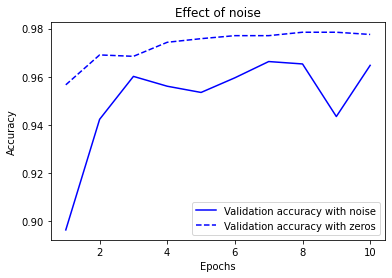

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros")
plt.title("Effect of noise")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()